In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/Covid Dataset.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [4]:
df.shape

(5434, 21)

*We have data of  5434 volunteers 21  features*

***DATA PREPROCESSING***

In [3]:
df.isnull().any()

Breathing Problem                          False
Fever                                      False
Dry Cough                                  False
Sore throat                                False
Running Nose                               False
Asthma                                     False
Chronic Lung Disease                       False
Headache                                   False
Heart Disease                              False
Diabetes                                   False
Hyper Tension                              False
Fatigue                                    False
Gastrointestinal                           False
Abroad travel                              False
Contact with COVID Patient                 False
Attended Large Gathering                   False
Visited Public Exposed Places              False
Family working in Public Exposed Places    False
Wearing Masks                              False
Sanitization from Market                   False
COVID-19            

*So we see there is no Null values , Even if it were there we could have removed the  feature  or equally distributed among the classes*

In [9]:
df.replace(to_replace = ['Yes','No'],
                 value =[1,0],inplace = True)

df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


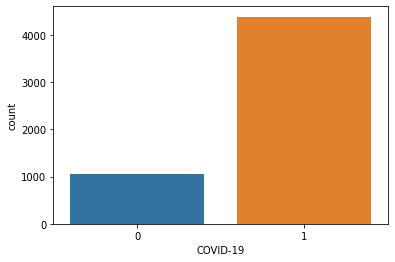

In [24]:
import  seaborn as sns
sns.countplot(df['COVID-19'])
plt.show()

In [28]:
cor_M = df.corr()
cor_M

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


*Not required are the features ones having negative or zero correlation in  the 'COVID-19' column. These features are'nt gonna be a deciding factor in diagnosis*

In [56]:
Uzlessfeatures = cor_M[(cor_M['COVID-19'] <= 0) | (cor_M['COVID-19'].isnull())]
ind = Uzlessfeatures.index
print('Useless Features : ',ind)

Useless Features :  Index(['Running Nose', 'Chronic Lung Disease', 'Headache', 'Fatigue ',
       'Gastrointestinal ', 'Wearing Masks', 'Sanitization from Market'],
      dtype='object')


In [55]:
df = df.drop(ind,axis=1)
df.shape

(5434, 14)

*gettign Input and  outut  columns from DataFrame*

In [69]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

*The dataset is quite imbalanced , To balance the dataset I use SMOT technique*

In [71]:
import sklearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


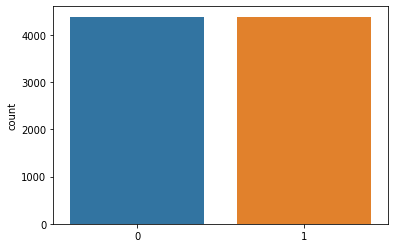

In [73]:
sns.countplot(y)
plt.show()

*We can see the both the classes has been matched*

***Model Building***

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

**Decision Tree**

In [103]:
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
acc_dt= dtmodel.score(X_test,y_test)
print(acc_dt)

0.9847908745247148


**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
acc_randomforest=model.score(X_test, y_test)
print(acc_randomforest)

0.9478183748310931


**K-Neighours**

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(X_test, y_test)
acc_knn

0.9756653992395438

**SVM with Linear Kernel**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = svclassifier.predict(X_test)
acc_svcL = accuracy_score(y_test,y_pred)
print(acc_svcL)

0.955893536121673


**SVM with Gaussian Kernel**

In [113]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_predg = svclassifier.predict(X_test)
acc_svcG = accuracy_score(y_test,y_predg)
print(acc_svcG)

0.9844106463878327


In [115]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines-Linear', 'Support Vector Machines-Gaussian','KNN',  
              'Random Forest',   'Decision Tree'],
    'Score': [acc_svcL,acc_svcG, acc_knn,
              acc_randomforest,  acc_dt,
               ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,0.984791
1,Support Vector Machines-Gaussian,0.984411
2,KNN,0.975665
0,Support Vector Machines-Linear,0.955894
3,Random Forest,0.947818
